# EDA Passegner Satisfaction
Kalina Jażdżyk Data Science student, MiNI PW

# Wprowadzenie 
Dane pobrane z Kaggle- https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction
Dane zawierają odpowiedzi na ankietę dotyczącą satsfakcji z obsługi pasażerów amerykańskich lini lotniczych. 


Wykorzystane biblioteki: 

In [ ]:
#import google.colab
import numpy as np
import pandas as pd
import seaborn as sns # package to visualize data
import matplotlib.pyplot as plt # another package to visualize data
from sklearn.preprocessing import StandardScaler, normalize # to use preprocessing of data
from sklearn.cluster import KMeans # The main package: The ML itself
from sklearn.decomposition import PCA # package for dimentionality reductions

Dane zostały załadowane do Google Colaboratory przez: 

In [ ]:
from google.colab import files
uploaded =files.upload() 

In [ ]:
data = pd.read_csv('/content/train.csv');

**Dane skąłdają się z 23 kolumn, w których przedstawione są następujące cechy:** 

Gender: Płeć pasażera (Female, Male)

Customer Type: Typ klienta (Loyal customer, disloyal customer)

Age: Wiek pasażera

Type of Travel: Cel podróży (Personal Travel, Business Travel)

Class: Klasa biletu (Business, Eco, Eco Plus)

Flight distance: Dystans podróży

Inflight wifi service: Poziom satysfakcji z Wifi (0:Not Applicable;0-5)

Departure/Arrival time convenient: Poziom satysfakcji z czasu odlotu/przylotu 

Ease of Online booking: Poziom satysfakcji z rezerwacji online

Gate location: Poziom satysfakcji z lokalizacji bramek

Food and drink: Poziom satysfakcji z oferowanych napojów i jedzenia 

Online boarding: Poziom satysfakcji z odprawy online

Seat comfort: Poziom satysfakcji z usytuowania

Inflight entertainment: Poziom satysfakcji z oferowanych w systemie rozrywki pokładowej 

On-board service: Poziom satysfakcji z serwisu pokałdowego

Leg room service: Poziom satysfakcji miejsca na nogi 

Baggage handling: Poziom satysfakcji z serwisu bagażowego 

Check-in service: Poziom satysfakcji z odprawy na lotnisku

Inflight service: Poziom satysfakcji obsługi lotniczej 

Cleanliness: Poziom satysfakcji z czystości

Departure Delay in Minutes: Opóźnienie w minutach podaczas odlotu   

Arrival Delay in Minutes: Opóźnienie w minutach w trakcie przylotu 

Satisfaction: Ogólny poziom satysfkacji (Satisfaction, neutral or dissatisfaction)

Większość zebranych danych dotyczy odczuwanej satysfakcji przez klienta lini lotniczych i jest przedsatwiona w skali od 0-5.

Kilka przykładowych rekordów ze zbioru danych:

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Rodzaj danych:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Podstawowe statystyki opisowe danych: 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


Dla kolumny wiek widać, że najmłodszy pasażer był w wieku 7 lat, a najstarszy 85 lat. Średni wiek pasażerów to 39 lat. 
Wiele zmiennych kategorycznych podanych w skali od 0 do 5. Największa średnia satysfakcja jest dla zmiennej Inflight service 3.64 czyli obsługi pokładowej, a najniższa średnia ocena satysfakcji występuje dla zmiennej Inflight wifi service 2.72.

Poszukiwanie braków w danych: 

In [ ]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Znalezione braki występują tylko w kolumnie Arrival Delay in Minutes. Sprawdźmy wiecej statsytyk, aby móc zdecydować co zrobić z takimi brakami.


Wykres poniżej przedstawia korealcję cech/zmiennych:

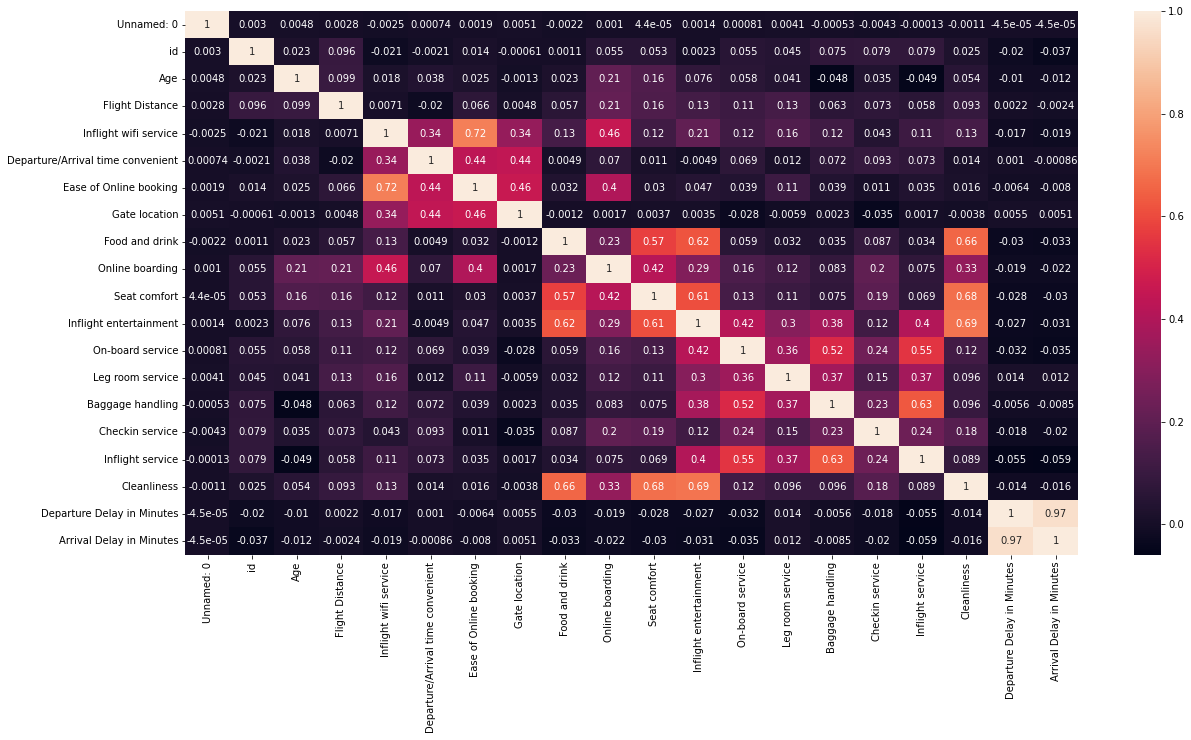

In [ ]:
correlations = data.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True)

W związku z wysoką korelacją zmiennych *Depatrure Delay in Minutes*, *Arrival Delay in Minutes* oraz dużą ilością wartości Na dla zmiennej *Arrival Departure* w analizie postanowiono, że nie wnosi ona istotnych informacji i usunięto ją ze zbioru. W poniźszym kodzie usunięto również zmienną id oraz zmienną Unnamed (numeryczną zmienną).

In [ ]:
data.drop('id', axis=1, inplace=True)

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.drop('Arrival Delay in Minutes', axis=1, inplace=True)

W związku z tym, że przedsawtione zamienne są różnych typów (kategoryczne, numeryczne itp.) zmienne nie przedsatwione w postaci liczbowych należy przekształcić. W tym celu do zmiennych przyjmujących tylko dwie wartości przyjęto przedział {0,1} natomiast do zmiennych z większą ilością przyjmowanych wartości użyto wbudowanej funkcji *get_dummies* w bibliotece *pandas*.

In [ ]:
#zmiana odpowiednich zmiennych na values 
data["Gender"] = data["Gender"].map({"Male":1,"Female":0})

In [ ]:
data["Customer Type"] = data["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})

In [ ]:
#data["Type of Travel"] = data["Type of Travel"].map({"Personal Travel":1,"Business travel":0})

In [ ]:
#data["Class"] = data["Class"].map({"Eco Plus":1,"Business":2,"Eco":0})

In [ ]:
data["satisfaction"] = data["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [ ]:
travel_dum = pd.get_dummies(data[["Type of Travel"]],drop_first=True)
class_dum = pd.get_dummies(data[["Class"]],drop_first=True)
train = pd.concat([data,travel_dum,class_dum],axis=1)
train.drop(["Type of Travel","Class"],axis=1,inplace=True)

Sprawdzenie wyników tej transformacji:

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Gender                             103904 non-null  int64
 1   Customer Type                      103904 non-null  int64
 2   Age                                103904 non-null  int64
 3   Flight Distance                    103904 non-null  int64
 4   Inflight wifi service              103904 non-null  int64
 5   Departure/Arrival time convenient  103904 non-null  int64
 6   Ease of Online booking             103904 non-null  int64
 7   Gate location                      103904 non-null  int64
 8   Food and drink                     103904 non-null  int64
 9   Online boarding                    103904 non-null  int64
 10  Seat comfort                       103904 non-null  int64
 11  Inflight entertainment             103904 non-null  int64
 12  On

Wszytskie zmienne są przestawione liczbowo. Zbadajmy występowanie outlierów w danych poprzez przestawienie wykresów boxplot.



Najpierw skupmy się na boxplotach zmiennych dotyczących satysfakcji więc na przedziale {0,1,2,3,4,5}. Boxploty zostały pogrupowane według podobieństw w ocenie klientów. Pierwsze tyczące się komfortu siedzeń, serwisu podkładowego oraz serwisu bagażowego możemy podsumować jako pozytywnie oceniane cenych przez większość klientów tych lini. 

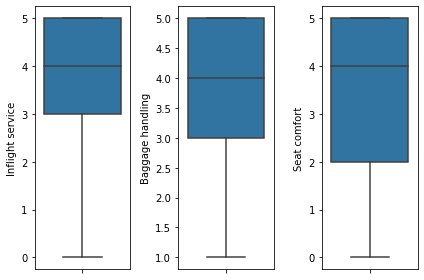

In [ ]:
fig, axes = plt.subplots(1,3)
names = ['Inflight service','Baggage handling','Seat comfort']
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=train[name], orient='v', ax=ax)
    
plt.tight_layout()

Kolejne boxploty pokazują nadal badane zmienne oceny satysfkacji oceniane podobnie. Są to zmienne: Checkin service, Cleanliness, Departure/arrival time convinient, Ease of online booking, Food and drinks, Gate location, Inflight entertaiment, Inflight wifi servise, Leeg room servise, On-board servise, Online boarding. Ich ocena jest średnia w zadanym przedziale. Przy zmiennej Checkin service widzimy outliery (są one istotnymi zmiennymi). 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


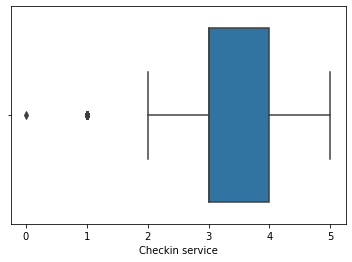

In [ ]:
sns.boxplot(train['Checkin service'])

Satysfakcja z odprawy na lotnisku wśród klientów również jest oceniana dość wysoko. 

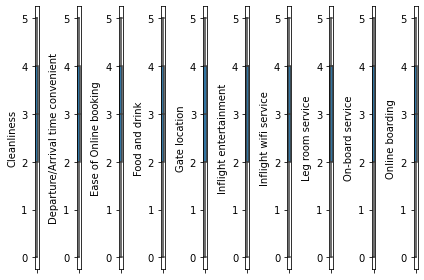

In [ ]:
fig, axes = plt.subplots(1,10)
names = ['Cleanliness','Departure/Arrival time convenient','Ease of Online booking','Food and drink','Gate location','Inflight entertainment','Inflight wifi service','Leg room service','On-board service','Online boarding']
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=train[name], orient='v', ax=ax)
    
plt.tight_layout()

Większość przedstawionych cech oceniana jest najczęsciej średnio co pokazują boxploty powyżej. Najwięcej klientów daje średnie oceny. 

Ostatnie trzy przedstawione boxploty nie dotyczą oceny satysfakcji klientów. Pokazują Wiek klientów, Opóźnienie wylotu w minutach oraz Dystans lotu. Wszytskie outliery zostały uznane za istotne na tym poziomie analizy. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


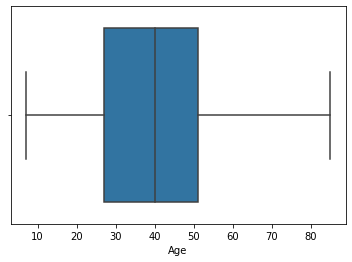

In [ ]:
sns.boxplot(train['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


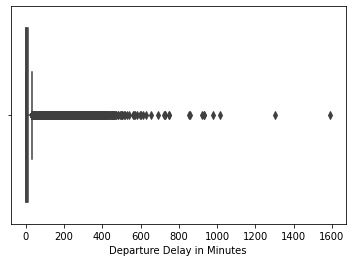

In [ ]:
sns.boxplot(train['Departure Delay in Minutes'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


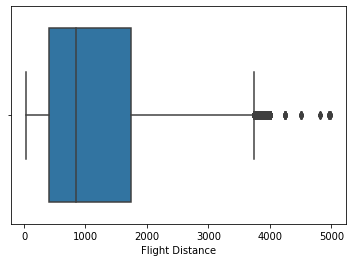

In [ ]:
sns.boxplot(train['Flight Distance'])

Zmienne nieuwzględnione w boxplotach to zmienne przyjmujące tylko kilka wartości (kategoryczne) nie pozwalające przedatwić się za pomocą tego rodzaju wykresów. Nic by nie wykazały. 


---

**Wykresy wybranych zależności między poszczególnymi zmiennymi:**

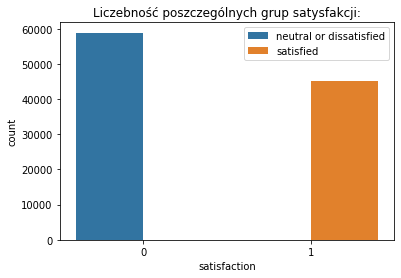

In [ ]:
#sparwdzenie liczebności poszczególnych grup satysfakcji
labels = ["neutral or dissatisfied","satisfied"]
sns.countplot(x='satisfaction',hue = 'satisfaction',data=data)
plt.title("Liczebność poszczególnych grup satysfakcji:")
plt.legend(labels=labels)

Na podsatwie powyżeszgo wykresu możemy założyć, że w badanych danych mamy podobną liczbeność zadowolnonych i niezadowolonych lub niokreślonych klientów. Oznacza to, że przedsatwione niżej wykresy mają sens. 

Text(0.5, 1.0, 'Zadowolenie z online boarding a ogólna satysfakcja:')

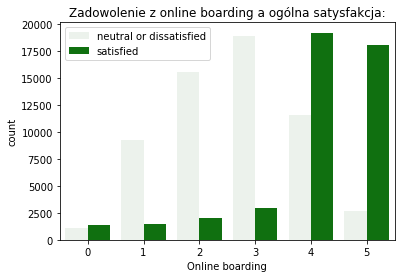

In [ ]:
#plt.figure(figsize=(20,20))
sns.countplot(x='Online boarding',hue="satisfaction",data=data,color="green")
plt.legend(labels=labels)
plt.title("Zadowolenie z online boarding a ogólna satysfakcja:")
#większa satysfakcja z online boarding => większa satysfakcja ogólna oczekiwany trend we wszytskich mierzonych satysfkacjach 

(0.0, 25000.0)

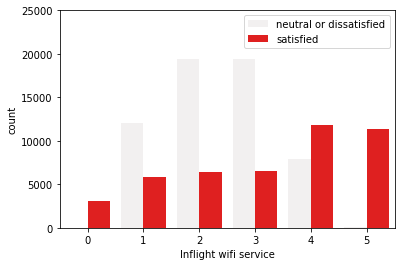

In [ ]:
sns.countplot(x='Inflight wifi service',hue="satisfaction",data=data,color="red")
plt.legend(labels=labels)
plt.ylim(0,25000)

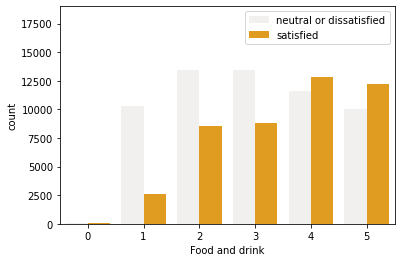

In [ ]:
sns.countplot(x='Food and drink',hue="satisfaction",data=data,color="orange")
plt.ylim(0,19000)
plt.legend(labels=labels)

Powyższe wykresy pokazują zależności miedzy zmiennymi oceny satysfakcji jakiejś usługi przez pasażerów do ogólnej oceny satysfakcji. Przewidywalnie wraz z lepszą oceną satysfakcji cechy większa ocena satysfakcji ogólnej. 

Poniżej wykres przedsatwia histogram zmiennej wiek wśród klientów. Najliczniejsze grupy pasażerów/ klientów to między 20-30 lat oraz 40-50.

Text(0.5, 1.0, 'Histogram wieku:')

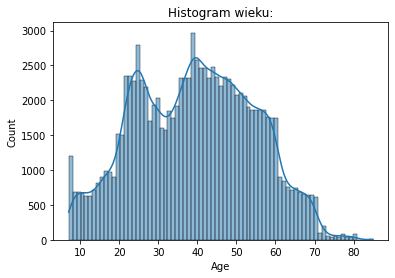

In [ ]:
#histogram zmiennej Age 
sns.histplot(x='Age',data=data,kde=True,palette="flare")
plt.title("Histogram wieku:")

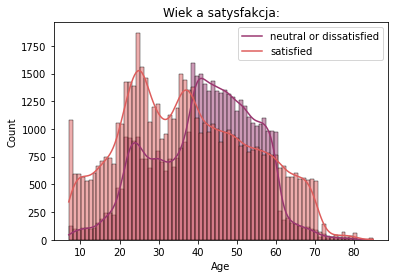

In [ ]:
#histogram zmiennej Age w zależności od satysfakcji 
sns.histplot(x='Age',hue="satisfaction",data=train,kde=True,palette="flare")
plt.title("Wiek a satysfakcja:")
plt.legend(labels=labels)

Na podstawie powyższego wykresu można założyć, że w najliczniejszych grupach wiekowych (na podstawie histogramu lub boxplota) 40-50 oraz 20-30 występują skłonności do wyrażania innych ocen satysfkacji. Mianowicie przestawiciele grupy 40-50 mają większą skłonność do bycia niezadowolonym z obsługi niż w grupie 20-30. Na podstawie pików występujących w histogramie oraz tendencji spadkowej po 40 roku życia wraz ze zwiększaniem zmiennej wiek możemy powiedzieć, że ta zmienna wpływa na odczucie satysfakcji klientów lini lotniczych.

Pobranie randomowej próbki danych w celu uproszczenia wykresu i ułatwienia dostrzeżenia niktórych zalezności. 

In [ ]:
from random import sample

In [ ]:
# #pobranie równej próbki 200 losowych rekordów z danych 
g = train.groupby('Customer Type').apply(lambda train: train.sample(200))

Text(0.5, 1.0, 'Lojalność klientów a wybierany dystans lotu:')

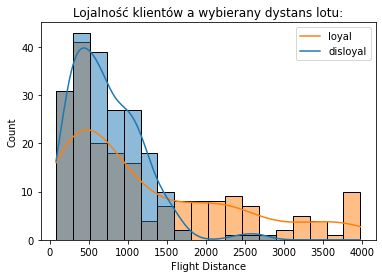

In [ ]:
sns.histplot(x='Flight Distance',hue="Customer Type",data=g,kde=True)
plt.legend(labels=["loyal","disloyal"])
plt.title("Lojalność klientów a wybierany dystans lotu:")
#lojalni klienci częściej wybierają te linie lotnicze na dłuższe podróże

Powyższy wyres pokazuje zależność miedzy lojalnością klienta (lojalny- nielojalny) a dystansem podróży. Widać wyraźną zależność lojalni klienci częściej skłonni są wybierać dłuższe podróże, kiedy nielojalni prawie w ogóle nie skłaniają się do kupna długich lotów. 

Czy występuje zalezność między poziomem satysfakcji a klasą biletu? 

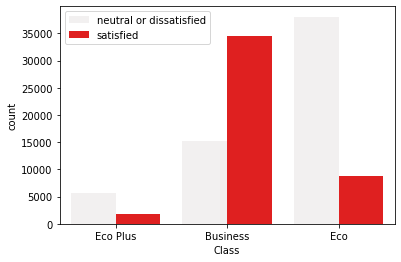

In [ ]:
sns.countplot(x='Class',hue="satisfaction",data=data,color="red")
plt.legend(labels=labels)

Odpowiadając na pytanie wydaje się, że istnieją zalezności, ale w związku z tym, że próby są różno liczne cieżko je zauważyć (głównie klasa ekonomiczna plus). Na pewno w business class klienci częściej są zadowoleni natomiast w klasie ekonomicznej proporcje są odwrócone. 

In [ ]:
def radar_plot(data,columns_names=data.describe().T.index):
  import plotly.express as px
  dane = dict(
      r=mean_values(data,columns_names),
      theta= mean_values(data,columns_names).index)
  df = pd.DataFrame(dane)
  fig = px.line_polar(df, r='r', theta='theta', line_close=True)
  fig.show()


In [ ]:
def mean_values(data,columns_names=data.describe().T.index):
  mean_values=data.describe().T['mean']
  mean_values = mean_values[columns_names]
  return mean_values


In [ ]:
def age_group(data,min_value,max_value):
  df = data[data['Age'].between(min_value, max_value)]
  return df


In [ ]:
categories = ['Inflight wifi service',     
'Departure/Arrival time convenient',
'Ease of Online booking' ,
'Gate location' ,
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service' ,
'Baggage handling',
'Checkin service' ,
'Inflight service',
'Cleanliness']

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatterpolar( 
    r = mean_values(age_group(train,0,19),categories),
    theta = categories,
      name='Gr 0-19'
))

fig.add_trace(go.Scatterpolar(
      r = mean_values(age_group(train,20,29),categories),
    theta = categories,
      name='Gr 20-29'
))

fig.add_trace(go.Scatterpolar(
      r = mean_values(age_group(train,30,39),categories),
    theta = categories,
      name='Gr 30-39'
))

fig.add_trace(go.Scatterpolar(
      r = mean_values(age_group(train,40,59),categories),
    theta = categories,
      name='Gr 40-59'
))
# fig.add_trace(go.Scatterpolar(
#       r = mean_values(age_group(train,50,59),categories),
#     theta = categories,
#       name='Gr 50-59'
# ))
fig.add_trace(go.Scatterpolar(
      r = mean_values(age_group(train,60,69),categories),
    theta = categories,
      name='Gr 60-69'
))
fig.add_trace(go.Scatterpolar(
      r = mean_values(age_group(train,70,85),categories),
    theta = categories,
      name='Gr 70-85'
))
fig.update_layout(polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 4]
    )),
  
  showlegend=False,
  width=1000, height=1000
)

fig.show()

Powyższy wykres przedstawia zależności między oceną satysfakcji, a przynależnością do danej grupy wiekowej. Grupy zostały wybrane co 10 lat. 

Wnioski z wykresu: 

Ogólnie najwyżej oceniającą grupą jest grupa 49-50. 

Najniżej oceniająca grupa to 70-85.

Wśród wyróżniających się cech znajdują się Departure/Arrival time convenient, Gate Localization oraz Online boarding. 